In [ ]:
# Machine Learning using MIT arrhythmia data set


In [42]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model
from sklearn import svm
from sklearn.svm import SVC
from sklearn import decomposition
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
import pywt

In [ ]:
arData = np.loadtxt(fname = "MIT-BIH_comb.csv",delimiter = ",",dtype='float')
#print (arData)
#augData = []
#for i in arData:
#    augData.append(i)
print (len(arData))

In [2]:
apData = np.loadtxt(fname = "MIT-BIH_bw_rs.csv",delimiter = ",",dtype='float')
print (len(apData))
print(apData.shape)

112551
(112551, 201)


In [16]:
apDatasub = np.loadtxt(fname = "MIT-BIH_sub.csv",delimiter = ",",dtype='float')
#print (len(apData100))
print(apDatasub.shape)

(24141, 201)


In [30]:
apDatasub2 = np.loadtxt(fname = "MIT-BIH_sub2.csv",delimiter = ",",dtype='float')
#print (len(apData100))
print(apDatasub2.shape)

(20542, 201)


In [3]:
apDatasub3 = np.loadtxt(fname = "MIT-BIH_sub3.csv",delimiter = ",",dtype='float')
#print (len(apData100))
print(apDatasub3.shape)

(23794, 201)


In [31]:
ct1 = 0
ct2 = 0
for i in range(0,len(apDatasub2)):
    if(apDatasub2[i][-1] == 1.0):
        ct1 += 1
    if(apDatasub2[i][-1] == 2.0):
        ct2 += 1
print (ct1)
print (ct2)

15331
5211


In [33]:
Ytargets = []
Xdata = []
Xtest = []
Ytest = []

rg = 4000
swn = 0
ct1 = 0
ct2 = 0

#test data must be different than training
trg = 1000
tswn = 4
tct1 = 0
tct2 = 0
for i in range(0,len(apDatasub2)):
    if(ct1<10000):
        if(apDatasub2[i][-1] == 1.0):
            Xdata.append(apDatasub2[i][:-1])
            Ytargets.append(apDatasub2[i][-1])
            ct1 += 1
    elif(tct1<1000):
        if(apDatasub2[i][-1] == 1.0):
            Xtest.append(apDatasub2[i][:-1])
            Ytest.append(apDatasub2[i][-1])
            tct1 += 1
            
    if(ct2<4000):
        if(apDatasub2[i][-1] == 2.0):
            Xdata.append(apDatasub2[i][:-1])
            Ytargets.append(apDatasub2[i][-1])
            ct2 += 1
    elif(tct2<1000):
        if(apDatasub2[i][-1] == 2.0):
            Xtest.append(apDatasub2[i][:-1])
            Ytest.append(apDatasub2[i][-1])
            tct2 += 1
print(len(Xdata))

#for i in range(trg*tswn,len(apDatasub2)):
#    if(tct1<trg):
#        if(apDatasub2[i][-1] == 1.0):
#            Xtest.append(apDatasub2[i][:-1])
#            Ytest.append(apDatasub2[i][-1])
#            tct1 += 1
#    if(tct2<trg):
#        if(apDatasub2[i][-1] == 2.0):
#            Xtest.append(apDatasub2[i][:-1])
#            Ytest.append(apDatasub2[i][-1])
#            tct2 += 1
print(len(Xtest))


14000
2000


In [ ]:
Ytargets = []
Xdata = []
Xtest = []
Ytest = []
for i in range(0,len(apData)):
    Xdata.append(apData[i][:-1])
    Ytargets.append(apData[i][-1])
print (len(Xdata[0]))
print (len(Xdata))

1.0


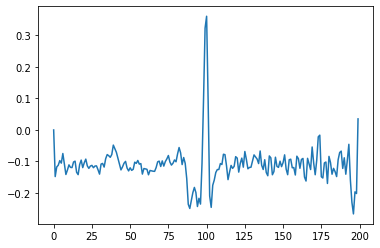

In [6]:
#plot data
#timeData0 = []
l = 100005
plt.plot(apData[l][:-1])
print (apData[l][-1])

In [5]:
trainsize = 80000

In [ ]:
#OLS Regression
trainsize = 80000
regr = linear_model.LinearRegression()

regr.fit(Xdata[0:trainsize], Ytargets[0:trainsize])
print('Learned Regression Coefficients = ', regr.coef_)
print('Learned Regression Intercept = ', regr.intercept_)
OLS_coeff = regr.coef_
print('Mean squared error (prediction error) = ', np.mean((regr.predict(Xdata[trainsize:]) - Ytargets[trainsize:])**2))

In [ ]:
#Ridge regression
min_mean = 100000
min_alpha = 0
trainsize = 80000
for i in range(0,1001):
    alpha = i
    regr = linear_model.Ridge(alpha)

    regr.fit(Xdata[0:trainsize], Ytargets[0:trainsize])
    mean = np.mean((regr.predict(Xdata[trainsize:]) - Ytargets[trainsize:])**2)
    
    if (mean < min_mean):
        min_mean = mean
        min_alpha = alpha
print(min_alpha)
print(min_mean)
#print('Learned Ridge Coefficients = ', regr.coef_)
#print('Learned Ridge Intercept = ', regr.intercept_)
#Ridge_coeff = regr.coef_
#print('Mean squared error (prediction error) = ', np.mean((regr.predict(Xdata[trainsize:]) - Ytargets[trainsize:])**2))

In [ ]:
#LASSO regression
min_mean = 100000
min_alpha = 0
trainsize = 80000
for i in range(1,1001):
    alpha = i
    regr = linear_model.Lasso(alpha)

    regr.fit(Xdata[0:trainsize], Ytargets[0:trainsize])
    mean = np.mean((regr.predict(Xdata[trainsize:]) - Ytargets[trainsize:])**2)
    
    if (mean < min_mean):
        min_mean = mean
        min_alpha = alpha
print(min_alpha)
print(min_mean)

In [ ]:
trainsize = 80000
clf = svm.SVC(gamma='auto', kernel='linear')
clf.fit(Xdata[0:trainsize], Ytargets[0:trainsize])
predYdata = clf.predict(Xdata[trainsize:])
total = 0
cPred = 0
for i in range(0,len(Ytargets[trainsize:])):
    if predYdata[i] == Ytargets[trainsize+i]:
        cPred += 1
    total += 1
accuracy = float(cPred)/float(total)
print (accuracy)

In [ ]:
clfrbf = svm.SVC(gamma='auto', kernel='rbf')
clfrbf.fit(Xdata[0:trainsize], Ytargets[0:trainsize])
predYdata = clfrbf.predict(Xdata[trainsize:])
total = 0
cPred = 0
for i in range(0,len(Ytargets[trainsize:])):
    if predYdata[i] == Ytargets[trainsize+i]:
        cPred += 1
    total += 1
accuracy = float(cPred)/float(total)
print (accuracy)

In [ ]:
predYdata = clfrbf.predict(Xdata[trainsize:])
total = 0
cPred = 0
for i in range(0,len(Ytargets[trainsize:])):
    if predYdata[i] == Ytargets[trainsize+i]:
        cPred += 1
    total += 1
accuracy = float(cPred)/float(total)
print (accuracy)

In [ ]:
for x in range(1,11):
    clfpoly = svm.SVC(gamma='auto', kernel='poly', degree = x)
    clfpoly.fit(Xdata[0:trainsize], Ytargets[0:trainsize])
    predYdata = clfpoly.predict(Xdata[trainsize:])
    total = 0
    cPred = 0
    for i in range(0,len(Ytargets[trainsize:])):
        if predYdata[i] == Ytargets[trainsize+i]:
            cPred += 1
        total += 1
    accuracy = float(cPred)/float(total)
    print ("Poly Degree: " + str(x))
    print (accuracy)
    print (" ")

In [ ]:
predYdata = clfp3.predict(Xdata[trainsize:])
total = 0
cPred = 0
for i in range(0,len(Ytargets[trainsize:])):
    if predYdata[i] == Ytargets[trainsize+i]:
        cPred += 1
    total += 1
accuracy = float(cPred)/float(total)
print (accuracy)

In [ ]:
for x in range(11,21):
    clfpoly = svm.SVC(gamma='auto', kernel='poly', degree = x)
    clfpoly.fit(Xdata[0:trainsize], Ytargets[0:trainsize])
    predYdata = clfpoly.predict(Xdata[trainsize:])
    total = 0
    cPred = 0
    for i in range(0,len(Ytargets[trainsize:])):
        if predYdata[i] == Ytargets[trainsize+i]:
            cPred += 1
        total += 1
    accuracy = float(cPred)/float(total)
    print ("Poly Degree: " + str(x))
    print (accuracy)
    print (" ")

In [ ]:
clfsig = svm.SVC(gamma='auto', kernel='sigmoid')
clfsig.fit(Xdata[0:trainsize], Ytargets[0:trainsize])
predYdata = clfsig.predict(Xdata[trainsize:])
total = 0
cPred = 0
for i in range(0,len(Ytargets[trainsize:])):
    if predYdata[i] == Ytargets[trainsize+i]:
        cPred += 1
    total += 1
accuracy = float(cPred)/float(total)
print ("Sig: ")
print (accuracy)
print (" ")

In [ ]:
from sklearn.svm import NuSVC

In [ ]:
clf = svm.NuSVC(gamma='auto', kernel='linear')
clf.fit(Xdata[0:trainsize], Ytargets[0:trainsize])
predYdata = clf.predict(Xdata[trainsize:])
total = 0
cPred = 0
for i in range(0,len(Ytargets[trainsize:])):
    if predYdata[i] == Ytargets[trainsize+i]:
        cPred += 1
    total += 1
accuracy = float(cPred)/float(total)
print (accuracy)

In [ ]:
Xnorm = preprocessing.normalize(Xdata[0:trainsize])
scaler = MinMaxScaler(feature_range=[0, 1])
data_rescaled = scaler.fit_transform(Xnorm[:, 0:200])

pca = decomposition.PCA().fit(data_rescaled)
#Plotting the Cumulative Summation of the Explained Variance
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.title('Pulsar Dataset Explained Variance')
plt.show()

In [ ]:
pca = decomposition.PCA(n_components=25)
pca.fit(Xnorm)
Xpca = pca.transform(Xnorm)

clf = svm.SVC(gamma='auto', kernel='linear')
clf.fit(Xpca, Ytargets[0:trainsize])

Xtest = preprocessing.normalize(Xdata[trainsize:])
pca.fit(Xtest)
XTestpca = pca.transform(Xtest)
predYdata = clf.predict(XTestpca)

total = 0
cPred = 0
for i in range(0,len(Ytargets[trainsize:])):
    if predYdata[i] == Ytargets[trainsize+i]:
        cPred += 1
    total += 1
accuracy = float(cPred)/float(total)
print (accuracy)

In [ ]:
clfrbf = svm.SVC(gamma='auto', kernel='rbf')
clfrbf.fit(Xpca, Ytargets[0:trainsize])
clfrbf.get_params()

XTestpca = pca.transform(Xtest)
predYdata = clfrbf.predict(XTestpca)

total = 0
cPred = 0
for i in range(0,len(Ytargets[trainsize:])):
    if predYdata[i] == Ytargets[trainsize+i]:
        cPred += 1
    total += 1
accuracy = float(cPred)/float(total)
print (accuracy)

In [ ]:
print(pywt.Modes.modes)

In [ ]:
coeffs = pywt.wavedec(Xdata[:trainsize],'db1',level=4)

In [ ]:
print (coeffs)

In [ ]:
A4,D4,D3,D2,D1 = coeffs

In [ ]:
len (D2[0])

In [ ]:
Xnorm = preprocessing.normalize(D2)
scaler = MinMaxScaler(feature_range=[0, 1])
data_rescaled = scaler.fit_transform(Xnorm[:, :])

pca = decomposition.PCA().fit(data_rescaled)
#Plotting the Cumulative Summation of the Explained Variance
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.title('Pulsar Dataset Explained Variance')
plt.show()

In [ ]:
D2norm = preprocessing.normalize(D2)
D2pca = decomposition.PCA(n_components=30)
D2pca.fit(D2norm)
D2tfm = D2pca.transform(D2norm)

D3norm = preprocessing.normalize(D3)
D3pca = decomposition.PCA(n_components=15)
D3pca.fit(D3norm)
D3tfm = D3pca.transform(D3norm)

D4norm = preprocessing.normalize(D4)
D4pca = decomposition.PCA(n_components=8)
D4pca.fit(D4norm)
D4tfm = D4pca.transform(D4norm)

A4norm = preprocessing.normalize(A4)
A4pca = decomposition.PCA(n_components=7)
A4pca.fit(A4norm)
A4tfm = A4pca.transform(A4norm)
0
Xpca = np.concatenate((A4tfm,D4tfm,D3tfm,D2tfm),axis=1)

#print (A4tfm.shape)
#print (D4tfm.shape)
#print (D3tfm.shape)
#print (D2tfm.shape)
#print (Xpca.shape)

clf = svm.SVC(gamma='auto', kernel='linear')
clf.fit(Xpca, Ytargets[0:trainsize])

In [ ]:
tcoeffs = pywt.wavedec(Xdata[trainsize:],'db1',level=4)
tA4,tD4,tD3,tD2,tD1 = tcoeffs

tD2norm = preprocessing.normalize(tD2)
tD2pca = decomposition.PCA(n_components=30)
tD2pca.fit(tD2norm)
tD2tfm = tD2pca.transform(tD2norm)

tD3norm = preprocessing.normalize(tD3)
tD3pca = decomposition.PCA(n_components=15)
tD3pca.fit(tD3norm)
tD3tfm = tD3pca.transform(tD3norm)

tD4norm = preprocessing.normalize(tD4)
tD4pca = decomposition.PCA(n_components=8)
tD4pca.fit(D4norm)
tD4tfm = tD4pca.transform(tD4norm)

tA4norm = preprocessing.normalize(tA4)
tA4pca = decomposition.PCA(n_components=7)
tA4pca.fit(tA4norm)
tA4tfm = tA4pca.transform(tA4norm)

tXpca = np.concatenate((tA4tfm,tD4tfm,tD3tfm,tD2tfm),axis=1)

predYdata = clf.predict(tXpca)

total = 0
cPred = 0
for i in range(0,len(Ytargets[trainsize:])):
    if predYdata[i] == Ytargets[trainsize+i]:
        cPred += 1
    total += 1
accuracy = float(cPred)/float(total)
print (accuracy)

In [34]:
##FFT^2
#Xtrain = Xdata[0:trainsize]
#Ytarg = Ytargets[0:trainsize]

Xfft = np.fft.fft(Xdata)

XfftTemp = Xfft
for i in range(0,len(Xfft)):
    for a in range(0,200):
        XfftTemp[i][a] = Xfft[i][a]**2

Xfft2 = XfftTemp.real



In [10]:
#SVM
clf = svm.SVC(C=0.0001, gamma='auto', kernel='linear')
clf.fit(Xfft2, Ytargets)

SVC(C=0.0001, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
#alter C value for optimization

In [41]:
clf = svm.SVC(C=0.0001, gamma='auto', kernel='linear')
clf.fit(Xfft2, Ytargets)
tXfft = np.fft.fft(Xtest)
tXfftTemp = tXfft
for i in range(0,len(tXfft)):
    for a in range(0,200):
        tXfftTemp[i][a] = tXfft[i][a].real*tXfft[i][a].real + tXfft[i][a].imag*tXfft[i][a].imag + 2*tXfft[i][a].real*tXfft[i][a].imag
tXfft2 = tXfftTemp.real
predYdata = clf.predict(tXfft2)

total = 0
cPred = 0
for i in range(0,len(Ytest)):
    if (predYdata[i] == Ytest[i]):
        cPred += 1
    total += 1
accuracy = float(cPred)/float(total)
print (accuracy)

0.763


In [44]:
#LDA
clf = LDA()
clf.fit(Xfft2,Ytargets)
tXfft = np.fft.fft(Xtest)
tXfftTemp = tXfft
for i in range(0,len(tXfft)):
    for a in range(0,200):
        tXfftTemp[i][a] = tXfft[i][a].real*tXfft[i][a].real + tXfft[i][a].imag*tXfft[i][a].imag + 2*tXfft[i][a].real*tXfft[i][a].imag
tXfft2 = tXfftTemp.real
predYdata = clf.predict(tXfft2)

total = 0
cPred = 0
for i in range(0,len(Ytest)):
    if (predYdata[i] == Ytest[i]):
        cPred += 1
    total += 1
accuracy = float(cPred)/float(total)
print (accuracy)

0.811
